In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import matplotlib as mpl
from statsmodels.stats.multitest import multipletests
def get_accuracy(result_path,fly_selected,channel,file_folder_name,acc_file,num_dim_file):
    file_folders = os.listdir(result_path)
    num_fly = len(fly_selected)
    num_channel_choice = len(channel)
    list_acc = []
    for i,id in enumerate(fly_selected):
        file_folder = file_folders[id]
        # load data
        the_path = result_path + '/' + file_folder + '/' + file_folder_name
        acc = np.load(the_path + '/' + acc_file)
        print(np.shape(acc))
        the_acc = np.mean(np.squeeze(acc),2)
        # load num_dim 
        num_dim = np.load(the_path+ '/'+num_dim_file)
        num_dim = np.squeeze(num_dim)
        if if_shuffle:
            the_acc = np.squeeze(the_acc[:,:,1])
            num_dim = np.squeeze(num_dim[:,:,1])
        else:
            the_acc = np.squeeze(the_acc[:,:,0])
            num_dim = np.squeeze(num_dim[:,:,0])
        
        # compute the_the_acc
        the_the_acc = np.zeros(num_channel_choice)
        for j in range(num_channel_choice):
            a = np.squeeze(the_acc[channel[j],:])
            n = np.squeeze(num_dim[channel[j],:])
            the_flag = 0
            for k in range(len(n)):
                if n[k]>=dim_thresh:
                    the_flag = k
                    break
            the_the_acc[j] = a[the_flag]

        list_acc.append(the_the_acc)
    list_acc = np.array(list_acc)
    list_acc = list_acc*100
    return np.squeeze(list_acc)

In [2]:
result_path = '../results/nsyb-G7f-rAch1h'
file_folder_name_1 = 'voxel-integration-region-SRD-long-formal'
file_folder_name_2 = 'voxel-integration-region-SRD-long-formal-nodenoise'
file_folder_name_3 = 'voxel-integration-region-long-formal-check-denoise'
fly_selected = [1,6]
if_save = True
if_shuffle = False
acc_file = 'list_list_accuracy.npy'
num_dim_file = 'list_list_num_dim.npy'
thresh = np.arange(0,1,0.02)
channel = np.array([0,1,2])
num_channel_choice = len(channel)
dim_thresh = 25
channel_selected = np.array([0,1])

figure_save_path = result_path + '/' + 'figures-for-revision1'+ '/check_denoise'
if if_save:
    f = os.path.exists(figure_save_path)
    if not f:
        os.makedirs(figure_save_path)

(3, 1, 1, 1, 50, 5, 2)
(3, 1, 1, 1, 50, 5, 2)
(3, 1, 1, 1, 50, 5, 2)
(3, 1, 1, 1, 50, 5, 2)
(3, 1, 1, 1, 50, 5, 2)
(3, 1, 1, 1, 50, 5, 2)
[[100.          96.66666667  98.88888889]
 [ 98.88888889  98.33333333  97.77777778]]
[[97.77777778 71.11111111 97.22222222]
 [83.88888889 70.55555556 75.55555556]]
[[99.44444444 95.55555556 98.88888889]
 [96.11111111 91.11111111 92.22222222]]
 p:
0.015625


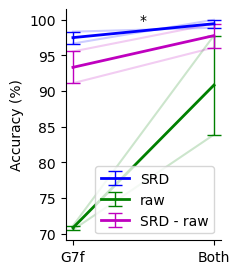

In [3]:
# acc gain
legends = ['SRD','raw','SRD - raw']
color_list = ['b','g','m']
ymax = 100

plt.figure(figsize = (2,3))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
list_acc_1 = get_accuracy(result_path,fly_selected,channel,file_folder_name_1,acc_file,num_dim_file)
list_acc_2 = get_accuracy(result_path,fly_selected,channel,file_folder_name_2,acc_file,num_dim_file)
list_acc_3 = get_accuracy(result_path,fly_selected,channel,file_folder_name_3,acc_file,num_dim_file)
print(list_acc_1)
print(list_acc_2)
print(list_acc_3)
num_fly = len(fly_selected)
list_acc = np.concatenate((list_acc_1,list_acc_2,list_acc_3),axis = 0)
list_acc = list_acc.reshape((num_fly,3,3),order = 'F')
for i in range(num_fly):
    a = np.squeeze(list_acc[i,0,channel_selected])
    plt.plot(a[::-1],color = color_list[0],alpha = 0.2)
    a = np.squeeze(list_acc[i,1,channel_selected])
    plt.plot(a[::-1],color = color_list[1],alpha = 0.2)
    a = np.squeeze(list_acc[i,2,channel_selected])
    plt.plot(a[::-1],color = color_list[2],alpha = 0.2)
for j in range(3):
    a = np.squeeze(list_acc[:,j,channel_selected])
    a = a[:,::-1]
    the_mean = np.mean(a,0)
    the_std = np.std(a,0,ddof = 1)/np.sqrt(np.size(a,0))
    plt.errorbar([0,1],the_mean,yerr=the_std,ecolor=color_list[j],elinewidth=1,marker='.',mfc=color_list[j],\
    mec=color_list[j],mew=1,ms=1,alpha=1,capsize=5,capthick=3,color=color_list[j], linewidth=2,label = legends[j])
    # plt.plot(a[::-1],color = color_list[j],label = legends[j])
# significance
a = np.squeeze(list_acc[:,:,0])
a = a.reshape(-1)
b = np.squeeze(list_acc[:,:,1])
b = b.reshape(-1)
res = wilcoxon(a,b,alternative = 'greater')
p = res.pvalue
print(' p:')
print(p)
if p<0.05 and p>=0.01:
    plt.text(0.5,ymax,'*',verticalalignment = 'center', horizontalalignment = 'center')
elif p<0.01 and p>0.001:
    plt.text(0.5,ymax,'**',verticalalignment = 'center', horizontalalignment = 'center')
elif p<0.001 and p>=0.0001:
    plt.text(0.5,ymax,'***',verticalalignment = 'center', horizontalalignment = 'center') 
elif p<0.0001:
    plt.text(0.5,ymax,'****',verticalalignment = 'center', horizontalalignment = 'center') 

plt.xticks([0,1],['G7f','Both'])
plt.ylabel('Accuracy (%)')
plt.legend()

if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(figure_save_path + '/' + 'accuracy_gain.pdf',dpi = 300,bbox_inches = 'tight')
    plt.savefig(figure_save_path + '/' + 'accuracy_gain.png',dpi = 300,bbox_inches = 'tight')
plt.show()


c:\Users\GTH\.conda\envs\fly_fjq\lib\site-packages\scipy\stats\_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


 p:
0.03125
 p:
0.043114446783075355
 p:
0.03125
[0.04311445 0.04311445 0.04311445]


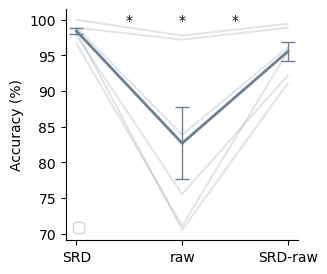

In [4]:
legends = [' - Both',' - G7f',' - rACh']
plt.figure(figsize = (3,3))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
color_list = ['orange','#006934','#751C77']
linestyles = ['-','-']
alphas = [1,0.3]
a = np.transpose(list_acc,[0,2,1])
a = a.reshape((6,-1))
for i in range(6):
    plt.plot(np.squeeze(a[i,:]),color = 'slategray',alpha = 0.2)
mean_a = np.mean(a,0)
std_a = np.std(a,0,ddof = 1)/np.sqrt(np.size(a,0))
plt.errorbar([0,1,2],mean_a,yerr=std_a,ecolor='slategray',elinewidth=1,marker='.',mfc='slategray',\
    mec='slategray',mew=1,ms=1,alpha=1,capsize=5,capthick=3,color='slategray', linewidth=2)
# for i in range(num_fly):
#     print(np.squeeze(list_acc[i,:,0]))
#     print(np.squeeze(list_acc[i,:,1]))
#     print(np.squeeze(list_acc[i,:,2]))
#     plt.plot(np.squeeze(list_acc[i,:,0]),color = color_list[0],linestyle = linestyles[i],alpha = alphas[i],label = 'fly '+str(i)+ legends[0])
#     plt.plot(np.squeeze(list_acc[i,:,1]),color = color_list[1],linestyle = linestyles[i],alpha = alphas[i],label = 'fly '+str(i)+ legends[1])
#     plt.plot(np.squeeze(list_acc[i,:,2]),color = color_list[2],linestyle = linestyles[i],alpha = alphas[i],label = 'fly '+str(i)+ legends[2])

# significance
p_list = []
for i in range(3):
    if i == 0:
        a = np.squeeze(list_acc[:,0,:])
        a = a.reshape(-1)
        b = np.squeeze(list_acc[:,1,:])
        b = b.reshape(-1)
    elif i ==1:
        a = np.squeeze(list_acc[:,0,:])
        a = a.reshape(-1)
        b = np.squeeze(list_acc[:,2,:])
        b = b.reshape(-1)
    else:
        a = np.squeeze(list_acc[:,1,:])
        a = a.reshape(-1)
        b = np.squeeze(list_acc[:,2,:])
        b = b.reshape(-1)
    res = wilcoxon(a,b)
    p = res.pvalue
    print(' p:')
    print(p)
    p_list.append(p)
p_corrected = multipletests(p_list,method = 'fdr_bh')
p_list = p_corrected[1]
print(p_list)
for i in range(3):
    p = p_list[i]
    if p<0.05 and p>=0.01:
        plt.text(i*0.5+0.5,ymax,'*',verticalalignment = 'center', horizontalalignment = 'center')
    elif p<0.01 and p>0.001:
        plt.text(i*0.5+0.5,ymax,'**',verticalalignment = 'center', horizontalalignment = 'center')
    elif p<0.001 and p>=0.0001:
        plt.text(i*0.5+0.5,ymax,'***',verticalalignment = 'center', horizontalalignment = 'center') 
    elif p<0.0001:
        plt.text(i*0.5+0.5,ymax,'****',verticalalignment = 'center', horizontalalignment = 'center') 

plt.xticks([0,1,2],['SRD','raw','SRD-raw'])
plt.ylabel('Accuracy (%)')
plt.legend()
if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(figure_save_path + '/' + 'accuracy_compare.pdf',dpi = 300,bbox_inches = 'tight')
    plt.savefig(figure_save_path + '/' + 'accuracy_compare.png',dpi = 300,bbox_inches = 'tight')
plt.show()
